In [1]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import Imputer

from sklearn.utils.estimator_checks import check_estimator

from sklearn.cross_validation import cross_val_score

In [2]:
trn_all = pd.read_csv('../data/train.csv')  # column #0 in our file is index

#selected features and Cut off outliers of Expected >= 69
#trn_new = trn_all[trn_all['Expected']<69]
trn_new = trn_all

#combine observations with same ID by using mean
#replace Nan by overall mean
trn_mean = trn_new.groupby(trn_new.Id).agg(['mean', 'median', 'std', 'count', 'min', 'max'])
trn_mean.columns = ['_'.join(col).strip() for col in trn_mean.columns.values]
trn_mean = trn_mean.drop(['Expected_count', 'Expected_median', 'Expected_std', 'Expected_min', 'Expected_max'], axis =1)

del trn_all
del trn_new

In [3]:
# ignore id's where all Ref vales are NaN
trn_mean = trn_mean[pd.notnull(trn_mean.Ref_mean)]

# Imputing
index2 = list(trn_mean)
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

trn_mean= pd.DataFrame(imp.fit_transform(trn_mean),index = trn_mean.index, columns=index2)

In [4]:
# data preparation
X = trn_mean.loc[:,'minutes_past_mean':'Kdp_5x5_90th_max']
y = trn_mean.loc[:,'Expected_mean']

del trn_mean

In [5]:
X

,minutes_past_mean,minutes_past_median,minutes_past_std,minutes_past_count,minutes_past_min,minutes_past_max,radardist_km_mean,radardist_km_median,radardist_km_std,radardist_km_count,...,Kdp_5x5_50th_std,Kdp_5x5_50th_count,Kdp_5x5_50th_min,Kdp_5x5_50th_max,Kdp_5x5_90th_mean,Kdp_5x5_90th_median,Kdp_5x5_90th_std,Kdp_5x5_90th_count,Kdp_5x5_90th_min,Kdp_5x5_90th_max
Id,,,,,,,,,,,,,,,,,,,,,
2,29.083333,28.5,18.725084,12,1,58,2,2,0,12,...,0.190814,11,-0.710007,0.000000,1.116661,1.059998,0.559860,12,0.349991,2.119995
4,28.153846,28.0,18.297751,13,0,56,9,9,0,13,...,1.586636,1,0.000000,0.000000,6.329994,6.329994,0.989956,2,5.629990,7.029999
7,30.933333,31.0,17.778264,15,3,58,13,13,0,15,...,1.586636,0,-3.235472,0.920437,3.744939,3.574677,2.987379,0,-0.070059,8.225340
8,31.083333,31.5,18.470903,12,3,59,8,8,0,12,...,1.073788,4,-1.240006,0.709991,3.734997,3.769997,0.913948,4,2.819992,4.580002
10,27.333333,27.5,16.794660,12,2,53,10,10,0,12,...,2.019780,12,-3.510010,3.509994,6.999995,7.599991,3.347386,12,2.119995,11.929993
11,29.428571,29.0,20.678952,7,1,58,12,12,0,7,...,0.812647,7,-1.059998,1.059998,2.465709,2.119995,0.885471,7,1.759994,3.879990
12,30.600000,30.5,17.251087,10,5,56,6,6,0,10,...,0.561014,10,-1.410004,0.699997,1.763994,1.584991,0.968528,10,0.709991,3.879990
14,30.600000,30.5,17.251087,10,5,56,14,14,0,10,...,0.605967,7,-0.710007,0.699997,3.699995,3.854996,2.061539,8,1.369995,6.769989
15,31.083333,31.5,18.470903,12,3,59,14,14,0,12,...,1.964733,6,-4.900009,0.349991,5.161425,4.229996,3.525136,7,2.190002,10.830002


In [10]:
from KDP_ZDR import KDPZDRRegressor
import matplotlib.pyplot as plt
# plot plots inline
%matplotlib inline  

scale = np.arange(1,1.1,0.001)
indexes = range(0,len(scale))
#print indexes
#print scale

In [11]:
MAE = []
for idx in indexes: 
    estimator=KDPZDRRegressor(kdpzdr_aa_scaling=scale[idx],kdpzdr_bb_scaling=1,kdpzdr_cc_scaling=1)
    estimator.fit(X = X, y =y)
    y_est = estimator.predict(X = X)
    MAE.append(sum(abs(y- y_est))/ len(y))
    #print scaling, MAE

opt = MAE.index(min(MAE))
scale[opt]

1.0

In [12]:
print(scale[opt])
print(MAE)

1.0
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


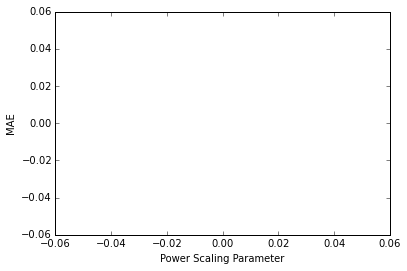

In [13]:
plt.plot(scale, MAE)
plt.xlabel("Power Scaling Parameter")
plt.ylabel("MAE")